Dataset Loaded Successfully!
Shape: (500, 6)


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1



Columns in dataset:
Index(['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)',
       'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)',
       'Blood Glucose Level (mg/dL)', 'Drug Response'],
      dtype='object')

Missing Values:
Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

Shape after removing missing rows: (500, 6)

Basic Statistics:


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


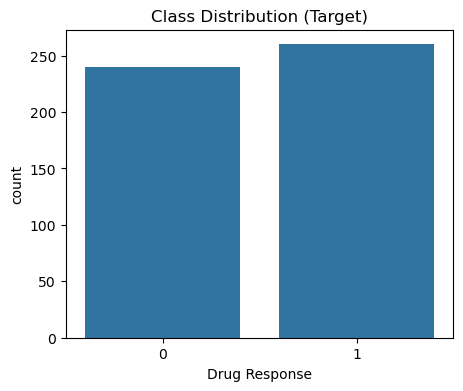

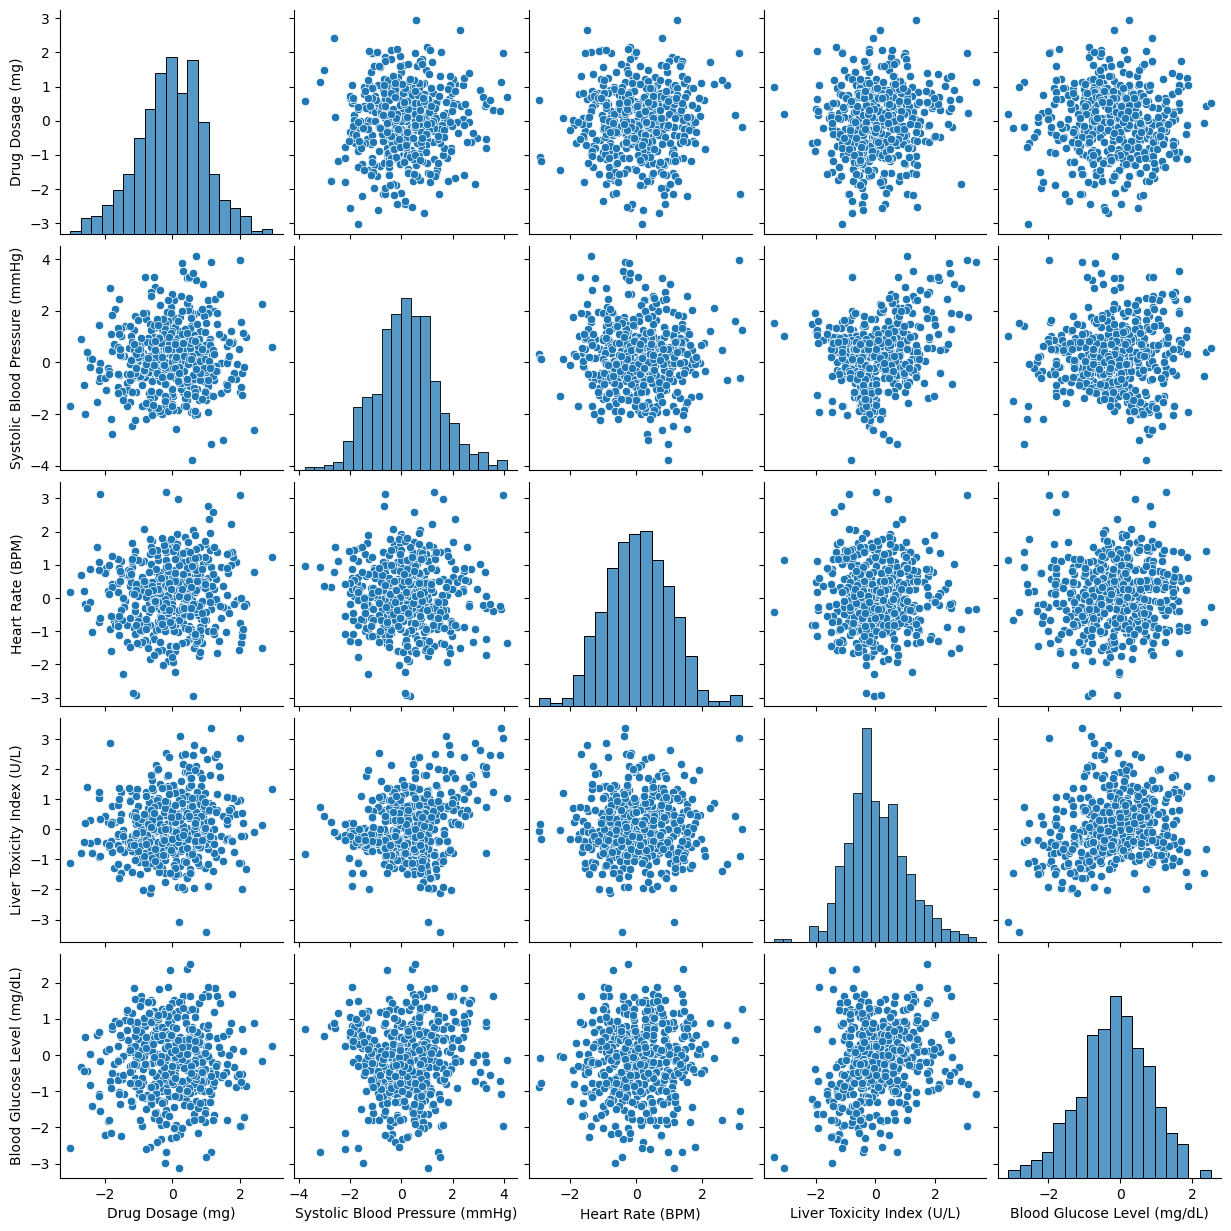

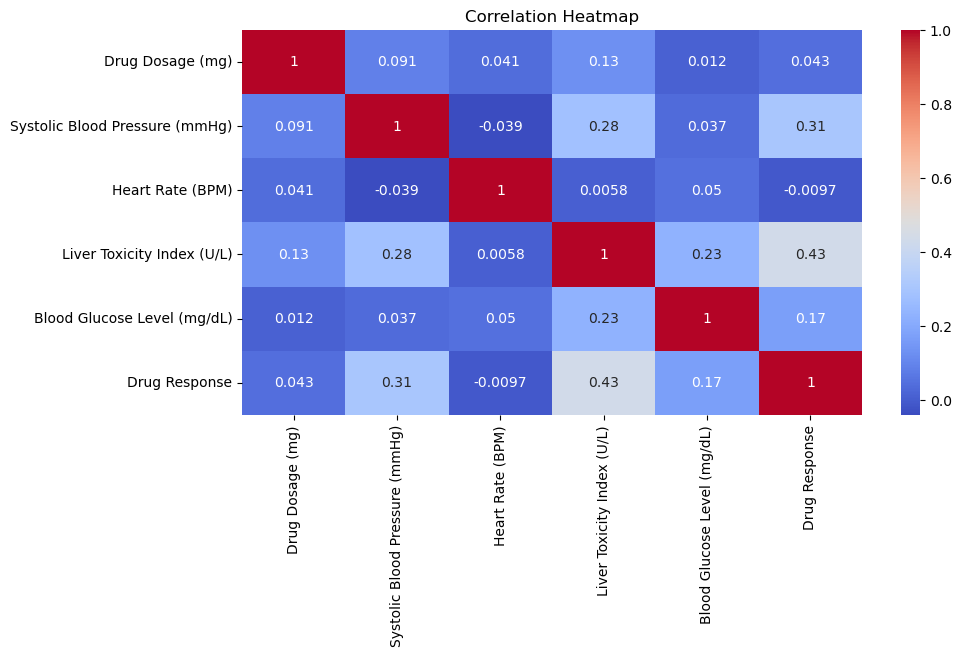


========== LINEAR KERNEL ==========
Accuracy: 0.78

Confusion Matrix:
 [[36  8]
 [14 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        44
           1       0.84      0.75      0.79        56

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100


========== POLY KERNEL ==========
Accuracy: 0.71

Confusion Matrix:
 [[40  4]
 [25 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.91      0.73        44
           1       0.89      0.55      0.68        56

    accuracy                           0.71       100
   macro avg       0.75      0.73      0.71       100
weighted avg       0.77      0.71      0.70       100


========== RBF KERNEL ==========
Accuracy: 0.84

Confusion Matrix:
 [[37  7]
 [ 9 47]]

Classification Report:
    

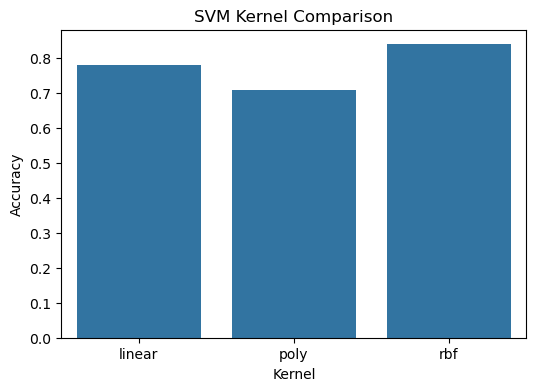

In [1]:
# ==========================================
# PROGRAM: SUPPORT VECTOR MACHINE (SVM)
# DATA: Pharma_Industry (1).csv
# TASKS:
#   1. Load dataset & EDA
#   2. Preprocessing (missing values, encoding, scaling)
#   3. Build SVM model (Linear, Polynomial, RBF)
#   4. Evaluate using accuracy, confusion matrix, classification report
#   5. Compare kernel performance
# ==========================================

# ---------------- IMPORTS ----------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------- LOAD DATA ----------------
df = pd.read_csv(r"C:\Users\abhin\Downloads\Pharma_Industry (1).csv")

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
display(df.head())

print("\nColumns in dataset:")
print(df.columns)

# ---------------- CHECK MISSING VALUES ----------------
print("\nMissing Values:")
print(df.isnull().sum())

# Remove rows with missing data (safe for assignment)
df = df.dropna()
print("\nShape after removing missing rows:", df.shape)

# ---------------- EDA ----------------
print("\nBasic Statistics:")
display(df.describe())

# Class Distribution
plt.figure(figsize=(5,4))
sns.countplot(x=df.iloc[:, -1])
plt.title("Class Distribution (Target)")
plt.show()

# Pairplot for first few columns
sns.pairplot(df.iloc[:, :5])
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ---------------- PREPROCESSING ----------------
# Separate X (features) and y (target)
X = df.iloc[:, :-1]  # all columns except last
y = df.iloc[:, -1]   # last column is target

# Label encode target if it is categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("\nLabel Encoding Applied on Target")

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------- SVM MODELS ----------------

results = {}

def train_svm(kernel_name, **kwargs):
    print(f"\n========== {kernel_name.upper()} KERNEL ==========")
    model = SVC(kernel=kernel_name, **kwargs)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[kernel_name] = acc

    print("Accuracy:", round(acc, 4))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    return model

# Train 3 kernels
model_linear = train_svm("linear")
model_poly = train_svm("poly", degree=3)
model_rbf = train_svm("rbf")

# ---------------- KERNEL COMPARISON ----------------
print("\n======= KERNEL PERFORMANCE COMPARISON =======")
for k, v in results.items():
    print(f"{k.upper()} Kernel Accuracy: {round(v, 4)}")

best_kernel = max(results, key=results.get)
print("\nBest Performing Kernel:", best_kernel.upper())

# ---------------- FINAL VISUALIZATION: Accuracies ----------------
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("SVM Kernel Comparison")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.show()


Shape: (500, 6)


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1



Data Types:


Drug Dosage (mg)                  float64
Systolic Blood Pressure (mmHg)    float64
Heart Rate (BPM)                  float64
Liver Toxicity Index (U/L)        float64
Blood Glucose Level (mg/dL)       float64
Drug Response                       int64
dtype: object


Missing Values:


Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64


MODEL: Logistic Regression
Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        48
           1       0.73      0.69      0.71        52

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100

Confusion Matrix:
 [[35 13]
 [16 36]]
ROC-AUC: 0.7896634615384616


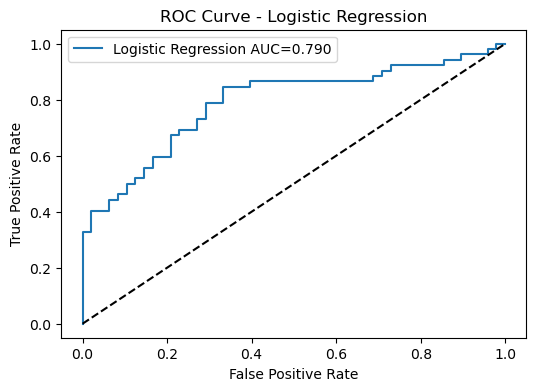


MODEL: Decision Tree
Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        48
           1       0.73      0.73      0.73        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100

Confusion Matrix:
 [[34 14]
 [14 38]]
ROC-AUC: 0.7882612179487178


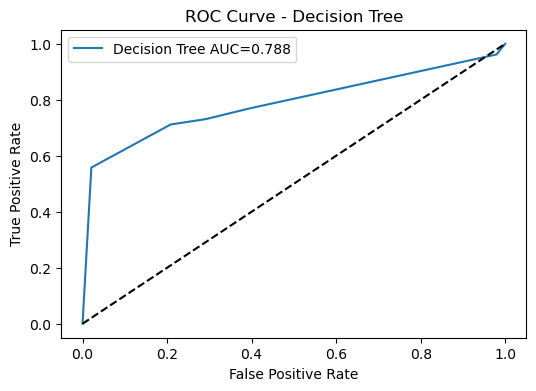


MODEL: Random Forest
Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75        48
           1       0.76      0.81      0.79        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100

Confusion Matrix:
 [[35 13]
 [10 42]]
ROC-AUC: 0.8263221153846155


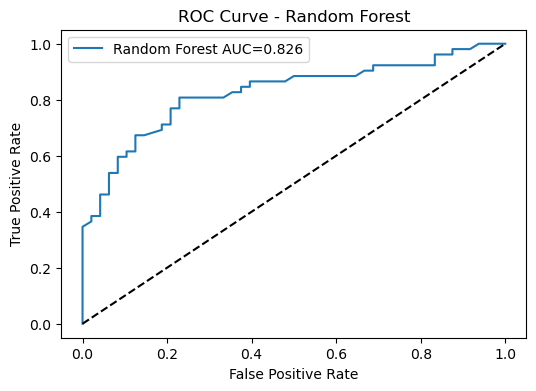


MODEL: SVM (RBF)
Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        48
           1       0.75      0.83      0.79        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100

Confusion Matrix:
 [[34 14]
 [ 9 43]]
ROC-AUC: 0.8433493589743589


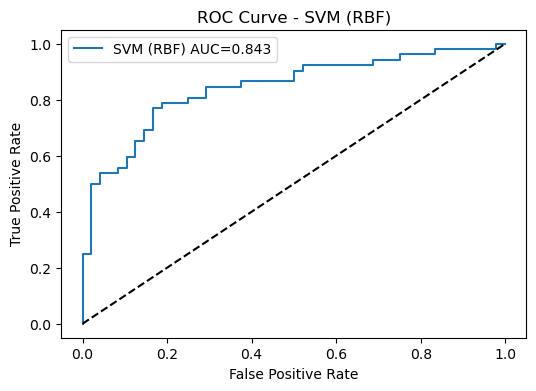



========= MODEL ACCURACY COMPARISON =========
Logistic Regression: 0.7100
Decision Tree: 0.7200
Random Forest: 0.7700
SVM (RBF): 0.7700


In [4]:
# =====================================
# Assignment 10 - Drug Response Classification
# Complete ML Pipeline
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# ------------------------------
# STEP 1: Load dataset
# ------------------------------

data_path = r"C:\Users\abhin\Downloads\Pharma_Industry (2).csv"   # your exact path
df = pd.read_csv(data_path)

print("Shape:", df.shape)
display(df.head())

# ------------------------------
# STEP 2: Basic info
# ------------------------------
print("\nData Types:")
display(df.dtypes)

print("\nMissing Values:")
display(df.isnull().sum())

# ------------------------------
# STEP 3: Split features & target
# ------------------------------

# Correct target column name
target_col = "Drug Response"

X = df.drop(columns=[target_col])
y = df[target_col]

# Convert categorical → dummy variables (if any)
X = pd.get_dummies(X, drop_first=True)

# ------------------------------
# STEP 4: Train-test split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------
# STEP 5: Feature scaling
# ------------------------------
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# ------------------------------
# STEP 6: Train multiple models
# ------------------------------

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', probability=True)
}

results = {}

for name, model in models.items():
    print("\n===============================")
    print(f"MODEL: {name}")
    print("===============================")

    model.fit(X_train_s, y_train)
    y_pred = model.predict(X_test_s)

    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    # Save results
    results[name] = acc

    # ROC-AUC (binary classification)
    if len(np.unique(y)) == 2:
        y_score = model.predict_proba(X_test_s)[:,1]
        auc = roc_auc_score(y_test, y_score)
        print("ROC-AUC:", auc)

        fpr, tpr, _ = roc_curve(y_test, y_score)
        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, label=f"{name} AUC={auc:.3f}")
        plt.plot([0,1], [0,1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend()
        plt.show()

# ------------------------------
# STEP 7: Model comparison
# ------------------------------

print("\n\n========= MODEL ACCURACY COMPARISON =========")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")
